<a href="https://colab.research.google.com/github/MatheusRobles/Ex_Machine_Learn_I/blob/main/EX_Machine_Learn_Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
df.shape

(214, 10)

In [3]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
contagem_valores = df['Type'].value_counts()
contagem_valores

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [19]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<Figure size 640x480 with 0 Axes>

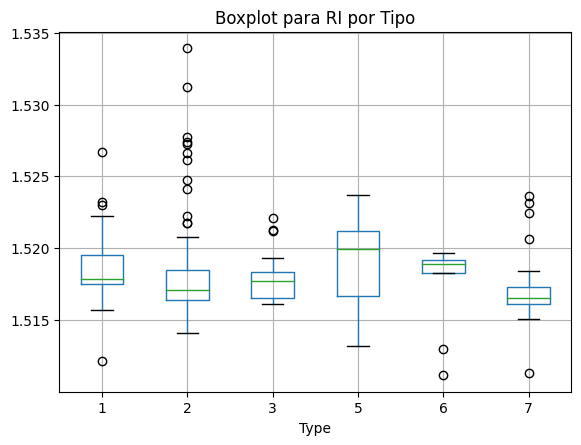

<Figure size 640x480 with 0 Axes>

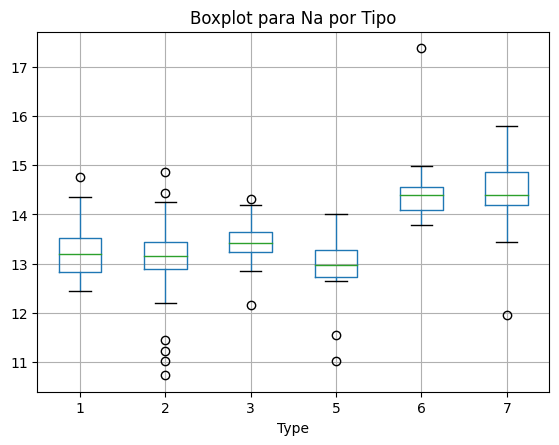

<Figure size 640x480 with 0 Axes>

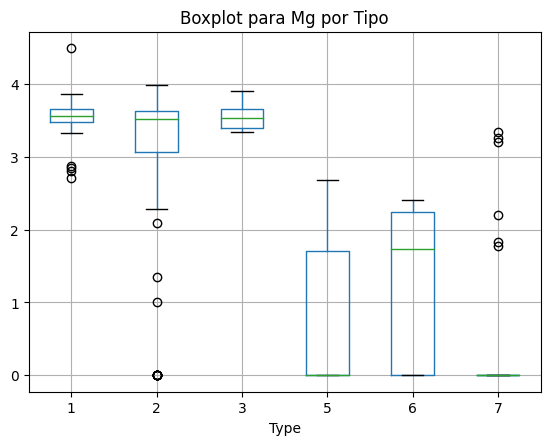

<Figure size 640x480 with 0 Axes>

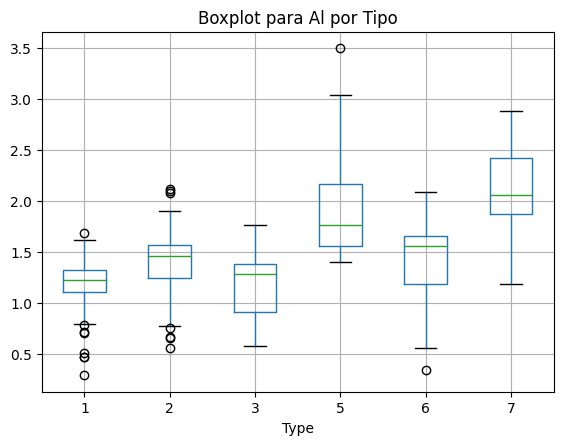

<Figure size 640x480 with 0 Axes>

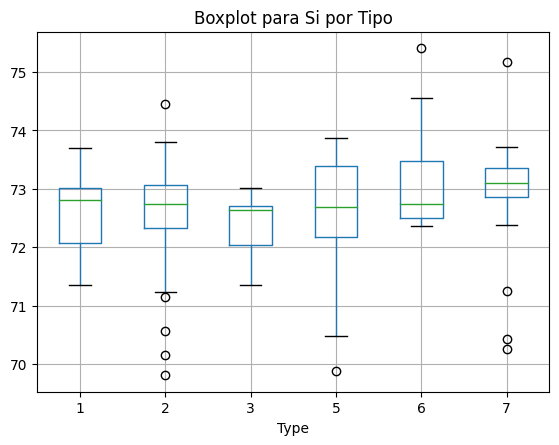

<Figure size 640x480 with 0 Axes>

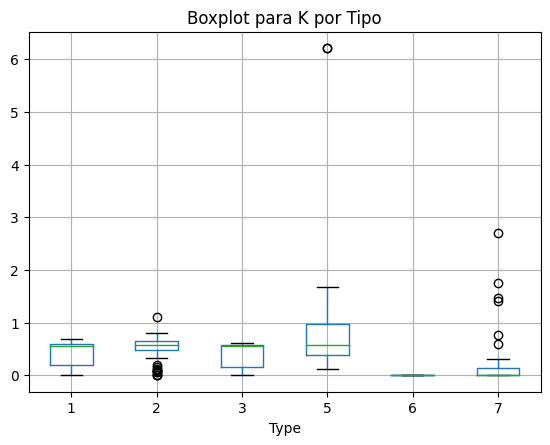

<Figure size 640x480 with 0 Axes>

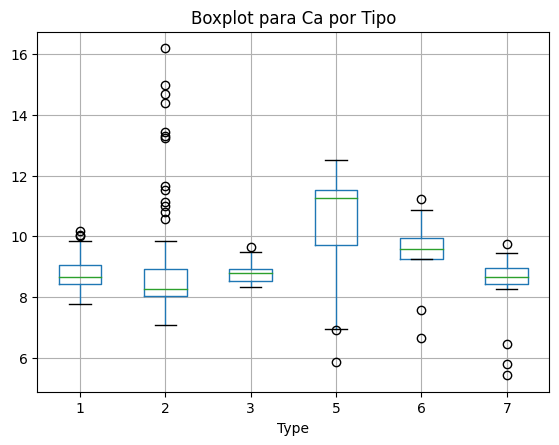

<Figure size 640x480 with 0 Axes>

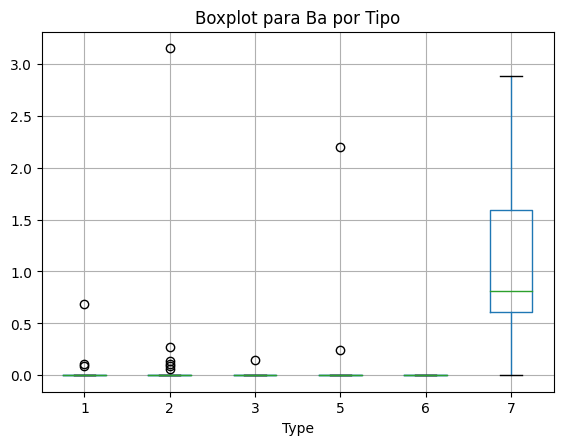

<Figure size 640x480 with 0 Axes>

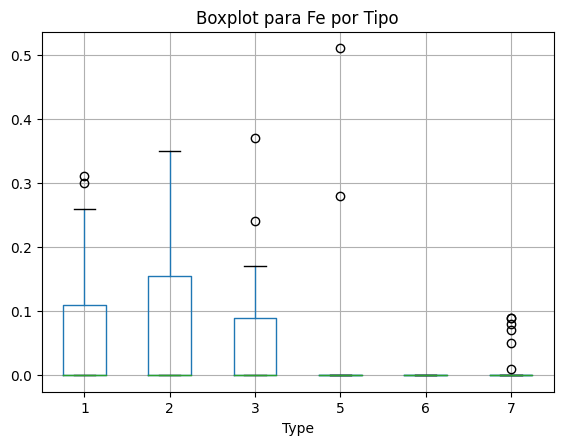

In [36]:
import matplotlib.pyplot as plt
colunas = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Criar um loop para plotar os boxplots
for coluna in colunas:
    plt.figure()
    df.boxplot(column=coluna, by='Type')
    plt.title(f'Boxplot para {coluna} por Tipo')
    plt.suptitle('')  # Remove o título padrão gerado pelo boxplot
    plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [43]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir o estimador
estimator = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros a serem testados
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
grid_search = GridSearchCV(estimator, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores parâmetros:", best_params)

Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Criar o modelo com os melhores parâmetros
model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Treinar o modelo com o conjunto de treinamento completo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.85        11\n           1       0.83      0.71      0.77        14\n           2       1.00      0.67      0.80         3\n           3       1.00      0.50      0.67         4\n           4       1.00      1.00      1.00         3\n           5       0.89      1.00      0.94         8\n\n    accuracy                           0.84        43\n   macro avg       0.91      0.81      0.84        43\nweighted avg       0.86      0.84      0.83        43\n'

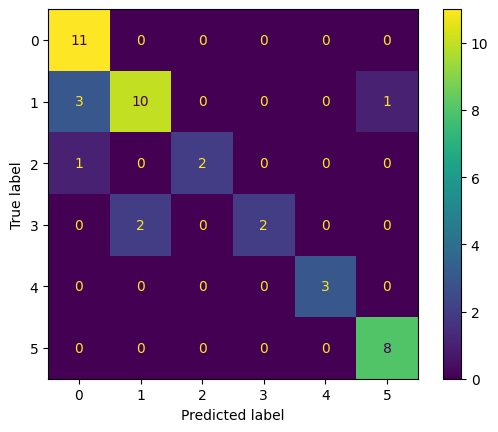

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()